In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
import os
FMP_API_KEY = os.environ.get('FMP_API_KEY')

In [3]:
# Define the ticker symbol for JPMorgan Chase & Co.
ticker_symbol = 'JPM'

# Initialize the yfinance Ticker object for JPM
jpm_ticker = yf.Ticker(ticker_symbol)

# Get available expiration dates
expiration_dates = jpm_ticker.options

# Choose an expiration date that exists in the list of available expiration dates
# For the purpose of this example, let's choose the first available expiration date
expiration_date = expiration_dates[0]

# Download the options data for JPM for the chosen expiration date
jpm_options = jpm_ticker.option_chain(expiration_date)

# Separate the calls and puts data
jpm_calls = jpm_options.calls
jpm_puts = jpm_options.puts

# Display the first few rows of the calls data
jpm_calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,JPM241101C00110000,2024-10-11 14:41:01+00:00,110.0,112.27,111.35,115.15,0.0,0.0,NaN,2,3.730469,True,REGULAR,USD
1,JPM241101C00165000,2024-10-10 17:52:05+00:00,165.0,47.40,56.40,60.15,0.0,0.0,NaN,1,1.780275,True,REGULAR,USD
2,JPM241101C00175000,2024-10-24 19:59:09+00:00,175.0,50.22,46.40,50.20,0.0,0.0,2.0,4,1.498049,True,REGULAR,USD
3,JPM241101C00180000,2024-10-11 15:11:14+00:00,180.0,43.50,41.40,45.20,0.0,0.0,1.0,20,1.350589,True,REGULAR,USD
4,JPM241101C00185000,2024-10-24 19:47:29+00:00,185.0,39.70,36.45,40.20,0.0,0.0,4.0,4,1.219730,True,REGULAR,USD


In [4]:
jpm_calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,JPM241101C00110000,2024-10-11 14:41:01+00:00,110.0,112.27,111.35,115.15,0.000000,0.000000,NaN,2,3.730469,True,REGULAR,USD
1,JPM241101C00165000,2024-10-10 17:52:05+00:00,165.0,47.40,56.40,60.15,0.000000,0.000000,NaN,1,1.780275,True,REGULAR,USD
2,JPM241101C00175000,2024-10-24 19:59:09+00:00,175.0,50.22,46.40,50.20,0.000000,0.000000,2.0,4,1.498049,True,REGULAR,USD
3,JPM241101C00180000,2024-10-11 15:11:14+00:00,180.0,43.50,41.40,45.20,0.000000,0.000000,1.0,20,1.350589,True,REGULAR,USD
4,JPM241101C00185000,2024-10-24 19:47:29+00:00,185.0,39.70,36.45,40.20,0.000000,0.000000,4.0,4,1.219730,True,REGULAR,USD
5,JPM241101C00190000,2024-10-10 17:54:07+00:00,190.0,23.00,31.45,35.20,0.000000,0.000000,2.0,1,1.075200,True,REGULAR,USD
6,JPM241101C00195000,2024-10-18 19:45:08+00:00,195.0,30.85,26.45,30.00,0.000000,0.000000,2.0,44,0.881837,True,REGULAR,USD
7,JPM241101C00200000,2024-10-28 18:56:07+00:00,200.0,25.35,21.50,24.05,0.000000,0.000000,1.0,56,1.017583,True,REGULAR,USD
8,JPM241101C00205000,2024-10-29 15:42:50+00:00,205.0,19.90,16.50,20.20,-0.180000,-0.896416,10.0,78,0.653324,True,REGULAR,USD
9,JPM241101C00207500,2024-10-18 15:59:03+00:00,207.5,18.55,14.00,16.95,0.000000,0.000000,1.0,1,0.844728,True,REGULAR,USD


In [5]:
# Preprocessing and feature engineering for JPM calls data
# Assume similar steps for puts data and other assets

# Drop rows with missing values
jpm_calls_cleaned = jpm_calls.dropna()

# Feature engineering: calculate moneyness, time to expiration and other relevant features
# Assuming that 'lastPrice' represents the current stock price
jpm_calls_cleaned['Moneyness'] = jpm_calls_cleaned['lastPrice'] / jpm_calls_cleaned['strike']
jpm_calls_cleaned['TimeToExpiration'] = (pd.to_datetime(expiration_date) - pd.Timestamp.now()).days

# Display the first few rows of the processed calls data
print(jpm_calls_cleaned.head())

       contractSymbol             lastTradeDate  strike  lastPrice    bid  \
2  JPM241101C00175000 2024-10-24 19:59:09+00:00   175.0      50.22  46.40   
3  JPM241101C00180000 2024-10-11 15:11:14+00:00   180.0      43.50  41.40   
4  JPM241101C00185000 2024-10-24 19:47:29+00:00   185.0      39.70  36.45   
5  JPM241101C00190000 2024-10-10 17:54:07+00:00   190.0      23.00  31.45   
6  JPM241101C00195000 2024-10-18 19:45:08+00:00   195.0      30.85  26.45   

    ask  change  percentChange  volume  openInterest  impliedVolatility  \
2  50.2     0.0            0.0     2.0             4           1.498049   
3  45.2     0.0            0.0     1.0            20           1.350589   
4  40.2     0.0            0.0     4.0             4           1.219730   
5  35.2     0.0            0.0     2.0             1           1.075200   
6  30.0     0.0            0.0     2.0            44           0.881837   

   inTheMoney contractSize currency  Moneyness  TimeToExpiration  
2        True      

/var/folders/ll/73c51kv535z52nyks80l9vmw0000gn/T/ipykernel_78284/1641090000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpm_calls_cleaned['Moneyness'] = jpm_calls_cleaned['lastPrice'] / jpm_calls_cleaned['strike']
/var/folders/ll/73c51kv535z52nyks80l9vmw0000gn/T/ipykernel_78284/1641090000.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpm_calls_cleaned['TimeToExpiration'] = (pd.to_datetime(expiration_date) - pd.Timestamp.now()).days


Text(0, 0.5, 'Frequency')

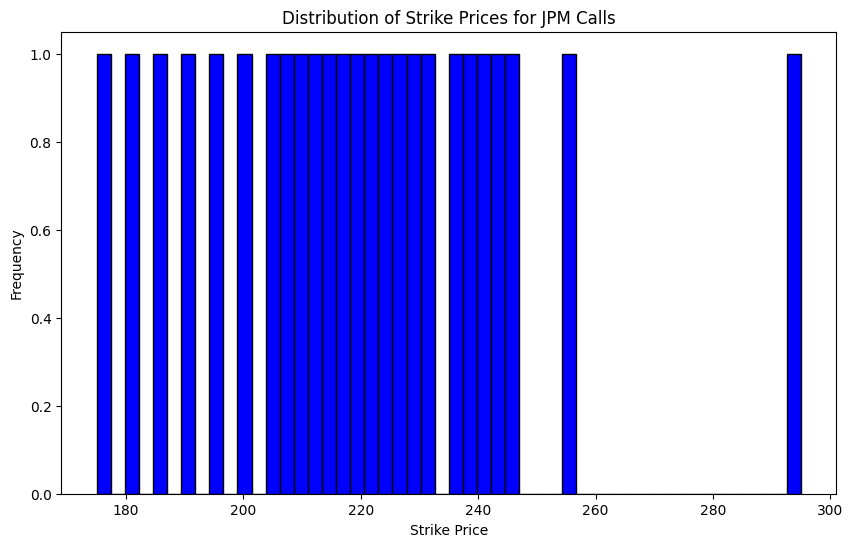

In [6]:
# Plot the distribution of strike prices for JPM calls
plt.figure(figsize=(10, 6))
plt.hist(jpm_calls_cleaned['strike'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Strike Prices for JPM Calls')
plt.xlabel('Strike Price')
plt.ylabel('Frequency')

In [7]:
X = jpm_calls_cleaned[['strike', 'Moneyness', 'TimeToExpiration']]
y = jpm_calls_cleaned['lastPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# scalarize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# implement the random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# Predict the option prices using the trained model
y_pred = rf_regressor.predict(X_test_scaled)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

In [11]:
#  Display the mean squared error
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 18.752455612000126


In [12]:
y_pred

array([15.3665,  0.0868, 40.545 ,  0.1684,  5.5301])

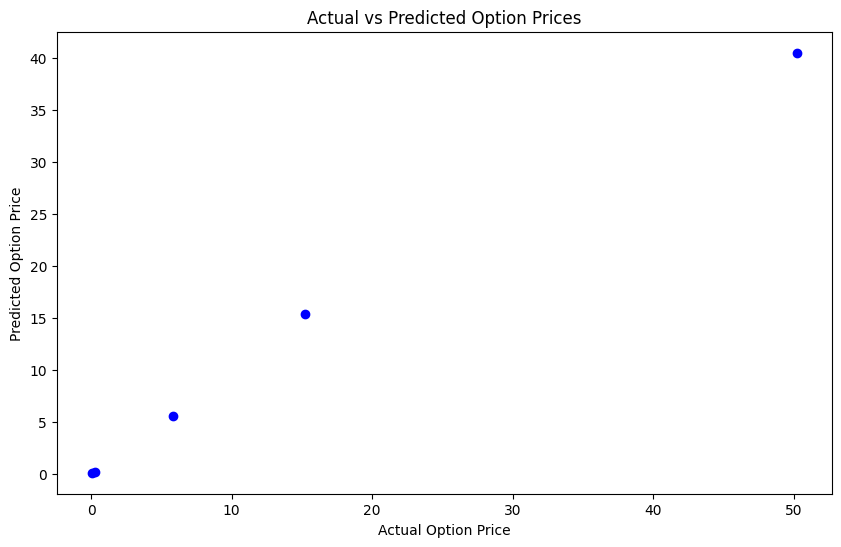

In [13]:
# plot the predicted vs actual option prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Option Price')
plt.title('Actual vs Predicted Option Prices')
plt.show()

In [14]:
from research.option_pricing import calculate_black_scholes

In [15]:
jpm_calls_cleaned

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Moneyness,TimeToExpiration
2,JPM241101C00175000,2024-10-24 19:59:09+00:00,175.0,50.22,46.40,50.20,0.000000,0.000000,2.0,4,1.498049,True,REGULAR,USD,0.286971,2
3,JPM241101C00180000,2024-10-11 15:11:14+00:00,180.0,43.50,41.40,45.20,0.000000,0.000000,1.0,20,1.350589,True,REGULAR,USD,0.241667,2
4,JPM241101C00185000,2024-10-24 19:47:29+00:00,185.0,39.70,36.45,40.20,0.000000,0.000000,4.0,4,1.219730,True,REGULAR,USD,0.214595,2
5,JPM241101C00190000,2024-10-10 17:54:07+00:00,190.0,23.00,31.45,35.20,0.000000,0.000000,2.0,1,1.075200,True,REGULAR,USD,0.121053,2
6,JPM241101C00195000,2024-10-18 19:45:08+00:00,195.0,30.85,26.45,30.00,0.000000,0.000000,2.0,44,0.881837,True,REGULAR,USD,0.158205,2
7,JPM241101C00200000,2024-10-28 18:56:07+00:00,200.0,25.35,21.50,24.05,0.000000,0.000000,1.0,56,1.017583,True,REGULAR,USD,0.126750,2
8,JPM241101C00205000,2024-10-29 15:42:50+00:00,205.0,19.90,16.50,20.20,-0.180000,-0.896416,10.0,78,0.653324,True,REGULAR,USD,0.097073,2
9,JPM241101C00207500,2024-10-18 15:59:03+00:00,207.5,18.55,14.00,16.95,0.000000,0.000000,1.0,1,0.844728,True,REGULAR,USD,0.089398,2
10,JPM241101C00210000,2024-10-28 13:32:32+00:00,210.0,15.20,12.25,13.40,0.599999,4.109585,1.0,317,0.520024,True,REGULAR,USD,0.072381,2
11,JPM241101C00212500,2024-10-29 17:16:35+00:00,212.5,11.50,9.80,11.95,-0.500000,-4.166666,1.0,34,0.656742,True,REGULAR,USD,0.054118,2


In [16]:
jpm_calls_cleaned = jpm_calls_cleaned[jpm_calls_cleaned['bid'] > 0]

In [17]:
jpm_calls_cleaned['BlackScholesPrice'] = jpm_calls_cleaned.apply(lambda row: calculate_black_scholes(
    price=row['bid'], 
    ex_price=row['strike'], 
    rfr=0.01,
    ttm=row['TimeToExpiration'] / 365, 
    sigma=row['impliedVolatility']
    ), axis=1)


/var/folders/ll/73c51kv535z52nyks80l9vmw0000gn/T/ipykernel_78284/293553304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jpm_calls_cleaned['BlackScholesPrice'] = jpm_calls_cleaned.apply(lambda row: calculate_black_scholes(


In [18]:
jpm_calls_cleaned[['strike', 'lastPrice', 'BlackScholesPrice']].head()

,strike,lastPrice,BlackScholesPrice
2,175.0,50.22,2.081615e-33
3,180.0,43.50,1.876262e-49
4,185.0,39.70,4.708444e-73
5,190.0,23.00,6.146497e-114
6,195.0,30.85,8.403332e-207


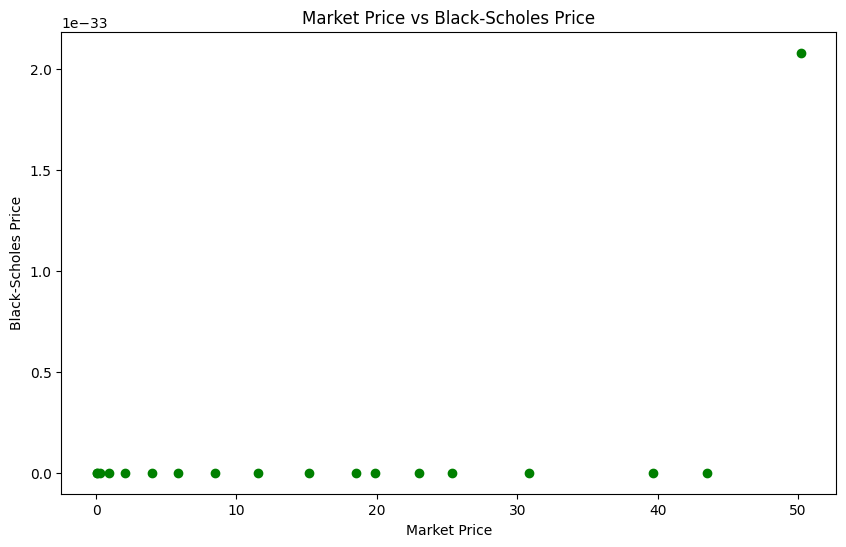

In [19]:
# synthetic black scholes price
plt.figure(figsize=(10, 6))
plt.scatter(jpm_calls_cleaned['lastPrice'], jpm_calls_cleaned['BlackScholesPrice'], color='green')
plt.xlabel('Market Price')
plt.ylabel('Black-Scholes Price')
plt.title('Market Price vs Black-Scholes Price')
plt.show()

In [20]:
from research.option_pricing import BlackScholesGreeks, BlackScholesModel, calculate_historical_volatility

In [21]:
jpm_data = yf.download(ticker_symbol, start='2020-01-01', end='2024-11-01')

[*********************100%***********************]  1 of 1 completed


In [22]:
jpm_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,JPM,JPM,JPM,JPM,JPM,JPM
Date,,,,,,
2020-01-02 00:00:00+00:00,122.104622,141.089996,141.100006,139.259995,139.789993,10803700
2020-01-03 00:00:00+00:00,120.493271,138.339996,139.229996,137.080002,137.500000,10386800
2020-01-06 00:00:00+00:00,120.397469,138.229996,138.270004,136.500000,136.559998,10259000
2020-01-07 00:00:00+00:00,118.350632,135.880005,137.860001,135.820007,137.279999,10531300
2020-01-08 00:00:00+00:00,119.273895,136.940002,137.580002,135.600006,135.699997,9695300
...,...,...,...,...,...,...
2024-10-23 00:00:00+00:00,223.410004,223.410004,224.800003,222.529999,223.660004,6180500
2024-10-24 00:00:00+00:00,224.979996,224.979996,225.059998,221.660004,221.830002,6002200


In [26]:
# calculate historical volatility
hist_vol = calculate_historical_volatility(jpm_data)
hist_vol

Ticker
JPM    0.324938
dtype: float64

In [33]:
jpm_data['Close'].loc['2020-01-02 00:00:00+00:00']

Ticker
JPM    141.089996
Name: 2020-01-02 00:00:00+00:00, dtype: float64

In [36]:
jpm_calls_cleaned.sort_values(by='lastTradeDate', ascending=False)

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Moneyness,TimeToExpiration,BlackScholesPrice
16,JPM241101C00225000,2024-10-29 19:59:53+00:00,225.0,0.90,0.89,0.95,-1.520000,-62.809920,4979.0,4350,0.223396,False,REGULAR,USD,0.004000,2,0.000000e+00
14,JPM241101C00220000,2024-10-29 19:59:43+00:00,220.0,3.95,3.60,3.90,-2.180000,-35.562805,21.0,802,0.267830,True,REGULAR,USD,0.017955,2,0.000000e+00
17,JPM241101C00227500,2024-10-29 19:59:07+00:00,227.5,0.30,0.29,0.32,-0.900000,-75.000000,5730.0,2623,0.211922,False,REGULAR,USD,0.001319,2,0.000000e+00
18,JPM241101C00230000,2024-10-29 19:58:33+00:00,230.0,0.08,0.07,0.09,-0.390000,-82.978730,3265.0,2348,0.209969,False,REGULAR,USD,0.000348,2,0.000000e+00
15,JPM241101C00222500,2024-10-29 19:58:32+00:00,222.5,2.04,2.04,2.10,-2.060000,-50.243904,1148.0,1644,0.235115,True,REGULAR,USD,0.009169,2,0.000000e+00
19,JPM241101C00232500,2024-10-29 19:23:53+00:00,232.5,0.03,0.01,0.03,-0.110000,-78.571430,306.0,3415,0.222664,False,REGULAR,USD,0.000129,2,0.000000e+00
13,JPM241101C00217500,2024-10-29 18:17:14+00:00,217.5,5.86,5.45,7.95,-2.690000,-31.461988,51.0,121,0.599125,True,REGULAR,USD,0.026943,2,0.000000e+00
12,JPM241101C00215000,2024-10-29 17:36:30+00:00,215.0,8.50,8.05,8.45,-2.350000,-21.658989,4.0,493,0.374762,True,REGULAR,USD,0.039535,2,0.000000e+00
11,JPM241101C00212500,2024-10-29 17:16:35+00:00,212.5,11.50,9.80,11.95,-0.500000,-4.166666,1.0,34,0.656742,True,REGULAR,USD,0.054118,2,0.000000e+00
8,JPM241101C00205000,2024-10-29 15:42:50+00:00,205.0,19.90,16.50,20.20,-0.180000,-0.896416,10.0,78,0.653324,True,REGULAR,USD,0.097073,2,0.000000e+00


In [45]:
bsm = BlackScholesModel(
    S=jpm_data['Close'].loc['2020-01-02 00:00:00+00:00'],
    K=jpm_calls_cleaned['strike'].loc[jpm_calls_cleaned.index[0]],
    r=0.01,
    T=jpm_calls_cleaned['TimeToExpiration'].loc[jpm_calls_cleaned.index[0]] / 365,
    sigma=hist_vol
)

In [46]:
bsm.call_option_price()

Ticker
JPM    7.165357e-20
Name: 2020-01-02 00:00:00+00:00, dtype: float64